In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing 

In [54]:
comp = pd.read_csv("Company_Data.csv")
comp

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [55]:
label_encoder = preprocessing.LabelEncoder()
comp['ShelveLoc']= label_encoder.fit_transform(comp['ShelveLoc']) 

In [56]:
label_encoder = preprocessing.LabelEncoder()
comp['Urban']= label_encoder.fit_transform(comp['Urban']) 

In [57]:
label_encoder = preprocessing.LabelEncoder()
comp['US']= label_encoder.fit_transform(comp['US']) 

In [58]:
comp.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,1.307500,53.322500,13.900000,0.705000,0.645000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,0.833475,16.200297,2.620528,0.456614,0.479113
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,0.000000,25.000000,10.000000,0.000000,0.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,1.000000,39.750000,12.000000,0.000000,0.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,2.000000,54.500000,14.000000,1.000000,1.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,2.000000,66.000000,16.000000,1.000000,1.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,2.000000,80.000000,18.000000,1.000000,1.000000


In [59]:
daf = pd.DataFrame(comp.Sales)
daf.loc[comp['Sales'] < 5, 'Sales Status'] = 'Good Sales' 
daf.loc[comp['Sales'] <= 8, 'Sales Status'] = 'Better Sales' 
daf.loc[comp['Sales'] > 8, 'Sales Status'] = 'Best Sales' 
z = daf
z

,Sales,Sales Status
0,9.50,Best Sales
1,11.22,Best Sales
2,10.06,Best Sales
3,7.40,Better Sales
4,4.15,Better Sales
...,...,...
395,12.57,Best Sales
396,6.14,Better Sales
397,7.41,Better Sales
398,5.94,Better Sales


In [60]:
comp.insert (11, "Sales_Status", z['Sales Status'])

In [61]:
comp 

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_Status
0,9.50,138,73,11,276,120,0,42,17,1,1,Best Sales
1,11.22,111,48,16,260,83,1,65,10,1,1,Best Sales
2,10.06,113,35,10,269,80,2,59,12,1,1,Best Sales
3,7.40,117,100,4,466,97,2,55,14,1,1,Better Sales
4,4.15,141,64,3,340,128,0,38,13,1,0,Better Sales
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1,Best Sales
396,6.14,139,23,3,37,120,2,55,11,0,1,Better Sales
397,7.41,162,26,12,368,159,2,40,18,1,1,Better Sales
398,5.94,100,79,7,284,95,0,50,12,1,1,Better Sales


In [62]:
x=comp.iloc[:,[1,2,3,4,5,6,7,8,9,10]]
y=comp['Sales_Status']

In [63]:
x 

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


In [64]:
y 

0        Best Sales
1        Best Sales
2        Best Sales
3      Better Sales
4      Better Sales
           ...     
395      Best Sales
396    Better Sales
397    Better Sales
398    Better Sales
399      Best Sales
Name: Sales_Status, Length: 400, dtype: object

In [65]:
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

##   Building Decision Tree Classifier using Entropy Criteria

In [66]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=4)
model.fit(x_train,y_train) 

DecisionTreeClassifier(criterion='entropy', max_depth=4)

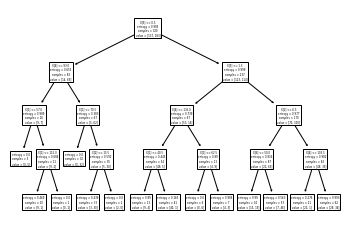

In [67]:
tree.plot_tree(model);

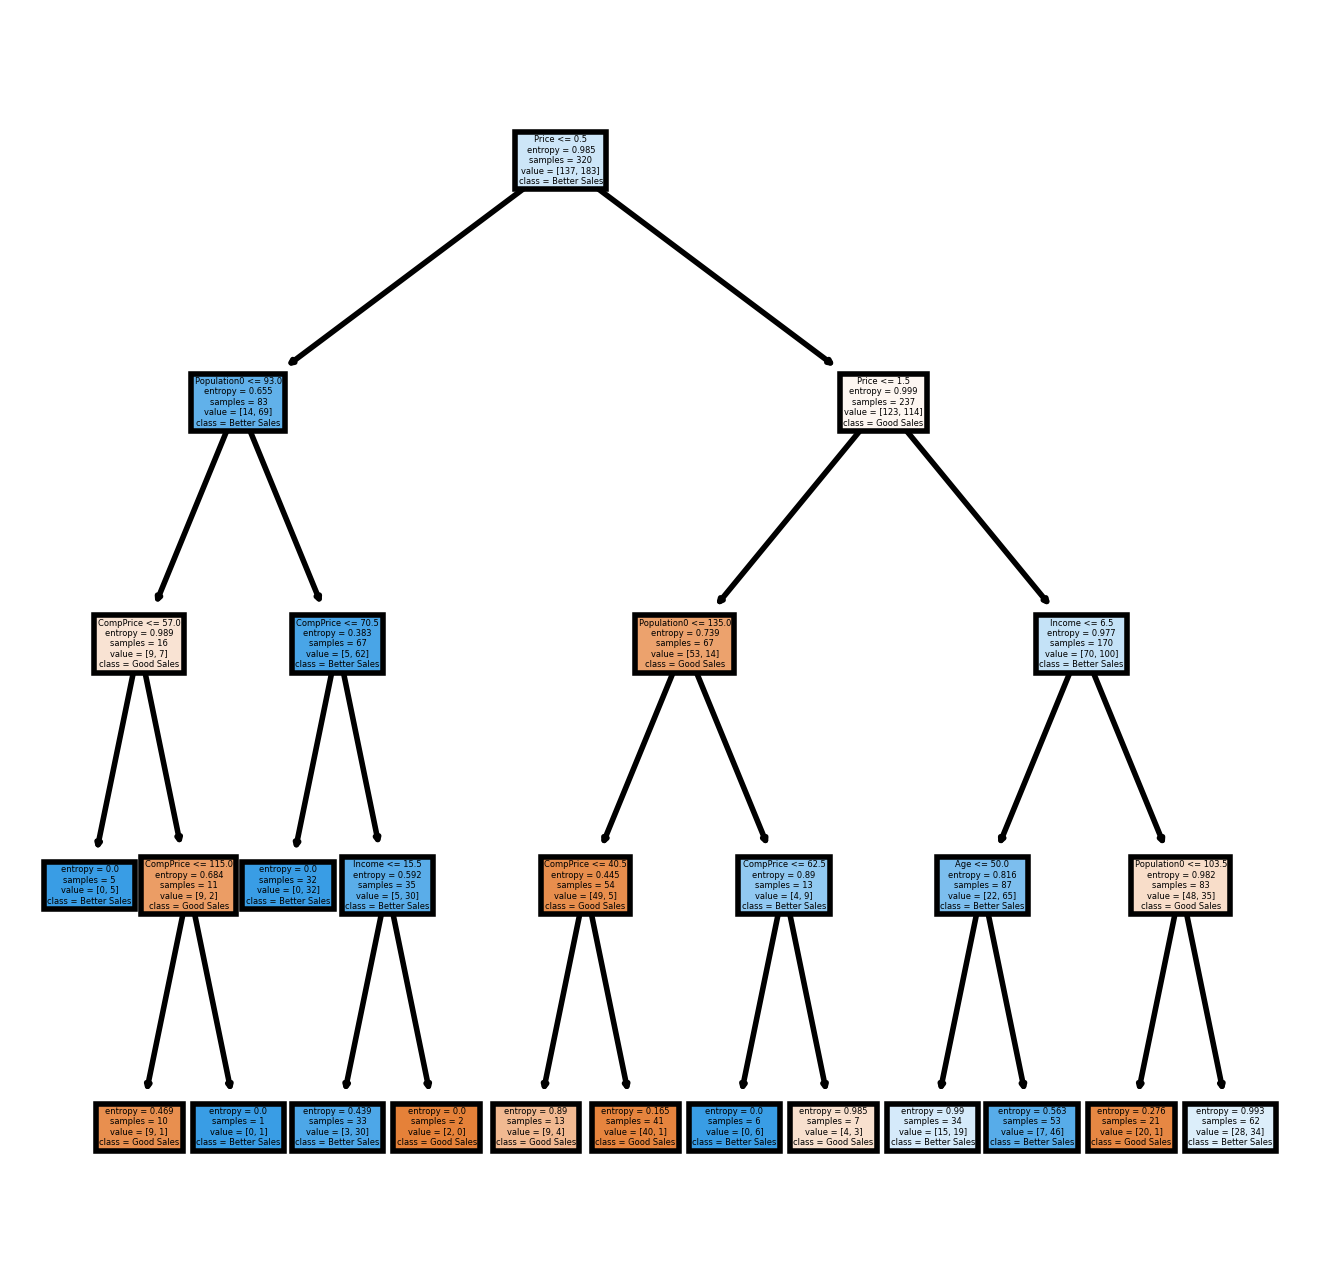

In [68]:
fn=['Sales','CompPrice','Income','Advertising','Population0','Price','Age','Education','Urban','US']
cn=['Good Sales','Better Sales','Best Sales']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=400) #dpi is dots per image
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True); 

In [69]:
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts()

Better Sales    58
Best Sales      22
dtype: int64

In [70]:
np.mean(preds==y_test)

0.7625

## Building Decision Tree Classifier (CART) using Gini Criteria

In [71]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3) 

In [72]:
model_gini.fit(x_train, y_train) 

DecisionTreeClassifier(max_depth=3)

In [73]:
pred=model.predict(x_test)
np.mean(preds==y_test) 

0.7625

## Decision Tree Regression Example

In [74]:
from sklearn.tree import DecisionTreeRegressor 

In [75]:
array = comp.values
X = array[:,0:11]
y = array[:,0] 

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1) 

In [77]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train) 

DecisionTreeRegressor()

In [78]:
model.score(X_test,y_test) 

0.9932172050934115